# IMDb using tensor flow

This is implementation of NLP using deeplearning methods (ANN and RNN) to predict sentiment of movie reviews based on the IMDb dataser. Then intend to save the models and deploy in a Flask app to compare the performance of each model


# the dataset

<p>Keras has the 50,000 reviews built in and there is a parameter to configure how many of top (most common) words you wanted to download.</p> 
<p>I did a training in Sklear for logistic regression with the fulldataset and it took ever 1 hour to complete. I will follow the code that is on Francois Chollet book "Deep Learning with Python" which he uses the top 10,000 most popular words.</p>

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

It is a little bit different becouse on the Keras the dataset is stored as numbers instead of words strings as the original data set I used for sklern training. Keras has a word index I will explore to be able to build a function to take an string as an argument to vectorize and input in the neuro network


In [2]:
# first 10 "words" of the first review on the training set
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [3]:
# Lets analyse the word index

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()


In [4]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [5]:
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3,'?') for i in encoded_review])
    
    


In [6]:
decode_review(train_data[0][:10])

'? this film was just brilliant casting location scenery story'

In [7]:
# now that we understand what is the structure of the data lets vectorize the data in 0 and 1 floats

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
# for labels is just a matter of transforming to floats

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
# the Keras make the model building very simple

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# lets validade our model using part of the training data for validation

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 270us/sample - loss: 0.5088 - accuracy: 0.7792 - val_loss: 0.3888 - val_accuracy: 0.8565
Epoch 2/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.3026 - accuracy: 0.9035 - val_loss: 0.3230 - val_accuracy: 0.8738
Epoch 3/20
15000/15000 [==============================] - 1s 72us/sample - loss: 0.2206 - accuracy: 0.9281 - val_loss: 0.2776 - val_accuracy: 0.8898
Epoch 4/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1706 - accuracy: 0.9434 - val_loss: 0.2828 - val_accuracy: 0.8863
Epoch 5/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.1395 - accuracy: 0.9563 - val_loss: 0.2877 - val_accuracy: 0.8878
Epoch 6/20
15000/15000 [==============================] - 1s 81us/sample - loss: 0.1152 - accuracy: 0.9647 - val_loss: 0.2940 - val_accuracy: 0.8869
Epoch 7/20
15000/15000 [==============================]

# Not too bad...

Validation accuracy 85%. Droped a bit but it took less than a minute to train compared to logistic regression over an hour to get an accuracy of 89%

In [13]:
# lets plot it

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 640x480 with 1 Axes>

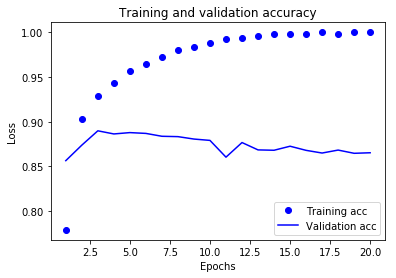

In [15]:

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
# on the chart it shows that the network started well and then dropped accurcy so... effort more effort to get worse.
# lets train it for only a few ephocs and see how it goes

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 98us/sample - loss: 0.4578 - accuracy: 0.8276
Epoch 2/4
25000/25000 [==============================] - 1s 49us/sample - loss: 0.2641 - accuracy: 0.9100
Epoch 3/4
25000/25000 [==============================] - 2s 62us/sample - loss: 0.2022 - accuracy: 0.9292
Epoch 4/4
25000/25000 [==============================] - 1s 49us/sample - loss: 0.1689 - accuracy: 0.9406
25000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [48]:
results

[0.29818446892738343, 0.8824]

In [ ]:
# WOW 88% so 1% worse than logistic regression and took 20 seconds to traning

In [62]:

model.predict(x_test[:3])

array([[0.22646508],
       [0.99991286],
       [0.9797767 ]], dtype=float32)

In [31]:
def decode_review_array(review_array):
    decoded = list()
    for review in review_array:
        decoded_review = ' '.join([reverse_word_index.get(i - 3,'?') for i in review])
        decoded.append(decoded_review)
    return decoded


In [65]:
for rev in decode_review_array(test_data[:3]):
    print(rev)
    print('\n')

? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it s

In [66]:
test_labels[:3]

array([0, 1, 1])

In [77]:
model.predict(x_test[0].reshape(1,10000))

array([[0.22646505]], dtype=float32)

In [73]:
x_test[:1].shape

(1, 10000)

In [78]:
pred_test = model.predict(x_test[:3])

In [81]:
# list comprehention to transform probs in predicitions
[1 if i>.5 else 0 for i in pred_test]

[0, 1, 1]

In [82]:
# save and load model

from tensorflow.keras.models import load_model

model.save('./pkl_objects/ann_IMDb.h5')  # creates a HDF5 file 'my_model.h5'


In [84]:
# test if loading well

del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('./pkl_objects/ann_IMDb.h5')

In [85]:
model

NameError: name 'model' is not defined

In [86]:
model = load_model('./pkl_objects/ann_IMDb.h5')

In [87]:
model.predict(x_test[:3])

array([[0.22646508],
       [0.99991286],
       [0.9797767 ]], dtype=float32)

In [88]:
# voila